In [1]:
!pip install ucimlrepo
!pip install sklearn

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd


/var/folders/fq/75r_9ntn2fs06ff282s31zrw0000gn/T/ipykernel_17922/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [52]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

Summary and structure of the dataframe

In [84]:
df = pd.concat([X, y], axis=1)
dfUntouched = df.copy()
df.head(40)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,>50K


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [55]:
df.shape

(48842, 15)

Taking care of null values and special characters

Encode ? as NaNs

In [56]:
df[df == '?'] = np.nan

In [57]:
def missing_value(df):
    miss=[]
    col_list=df.columns
    for i in col_list:
        missing=df[i].isnull().sum()
        miss.append(missing)
        list_of_missing=pd.DataFrame(list(zip(col_list,miss)))
    return list_of_missing

missing_value(data_df)

,0,1
0,age,0
1,workclass,963
2,fnlwgt,0
3,education,0
4,education-num,0
5,marital-status,0
6,occupation,966
7,relationship,0
8,race,0
9,sex,0


In [58]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [59]:
missing_value(df)

,0,1
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education-num,0
5,marital-status,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [94]:
df.drop(['education'], axis=1, inplace=True)

In [95]:
for column in df.columns:
    # Check if the column data type is object (i.e., categorical)
    if df[column].dtype == 'object':
        # Print the column name and its unique categorical values
        print(column + ":")
        print(df[column].unique())
        print()

workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex:
['Male' 'Female']

income:
['<=50K' '>50K']



In [96]:
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
print(df['income'].unique())

['<=50K' '>50K']


In [97]:
never_worked_rows = df[df['workclass'] == 'Never-worked']
never_worked_rows.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income


In [93]:
df = df[df['workclass'] != 'Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income


In [99]:
age = df[df['age'] > 80]
age.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
222,90,Private,51744,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,<=50K
918,81,Self-emp-not-inc,136063,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,<=50K
1040,90,Private,137018,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,<=50K
1168,88,Self-emp-not-inc,206291,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,<=50K
1935,90,Private,221832,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,<=50K


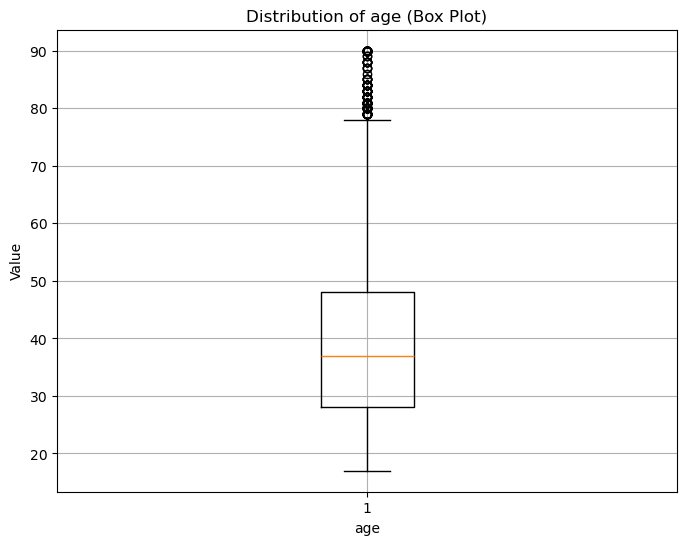

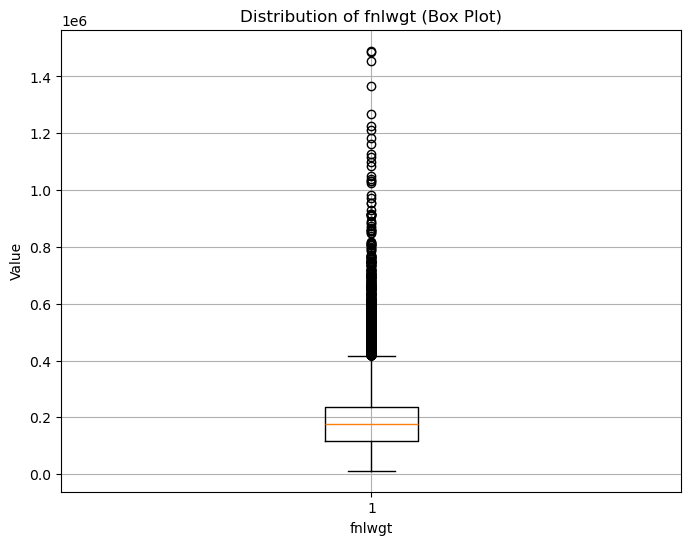

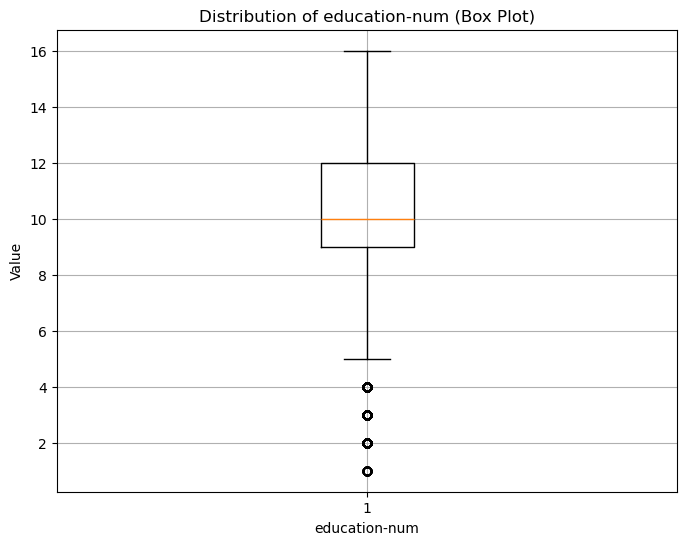

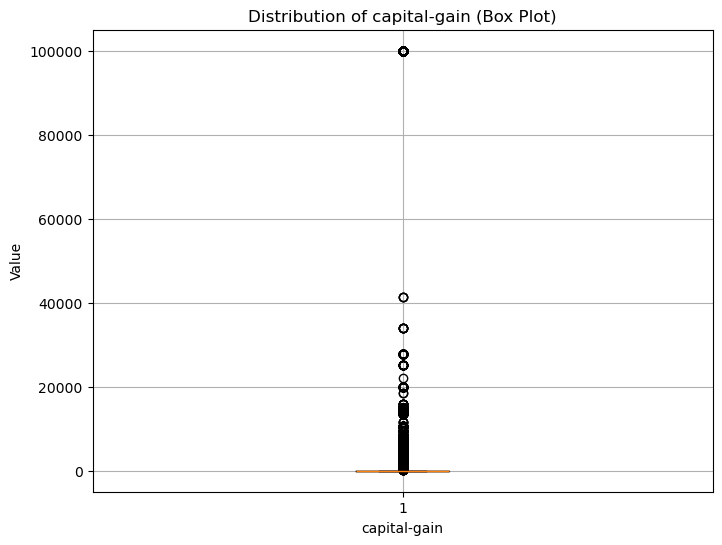

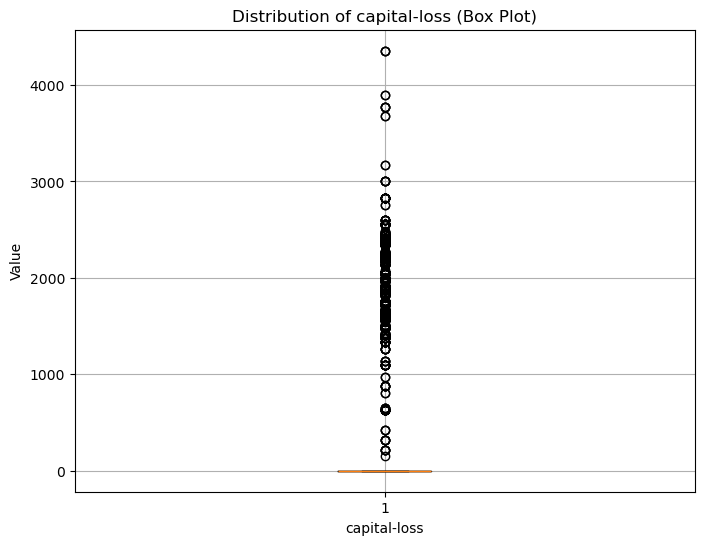

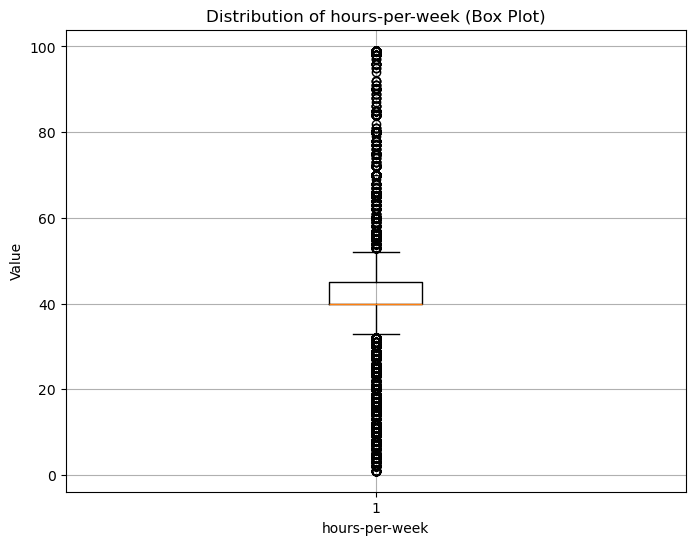

In [98]:
##finding outliers
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a pandas DataFrame named 'df'

# Select the numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create box plots for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Distribution of {col} (Box Plot)')
    plt.grid(True)
    plt.show()

income
<=50K    37145
>50K     11687
Name: count, dtype: int64


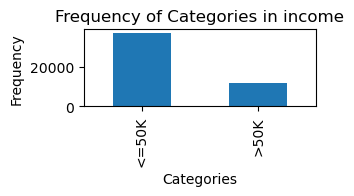

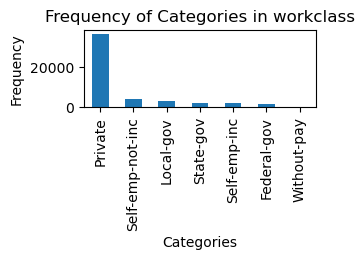

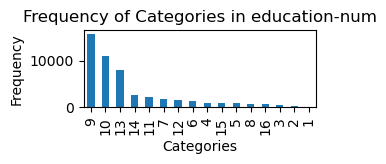

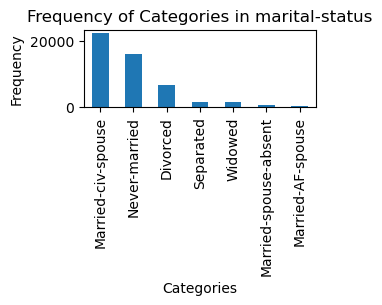

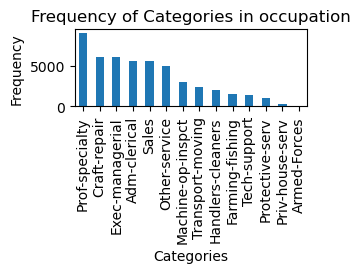

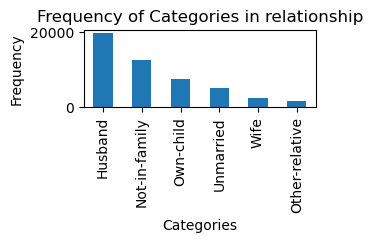

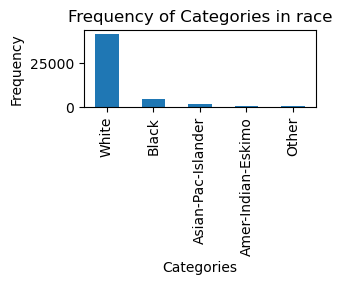

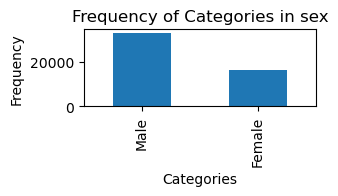

In [105]:
import matplotlib.pyplot as plt
columns = ['income', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for i in columns:
    frequency = df[i].value_counts()
    plt.figure(figsize=(3, 1))
    frequency.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Frequency of Categories in ' + i)
    plt.show()



Separating target colomun from the fratures

In [ ]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
        

Splitting into train and test datasets 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
3833,43,Private,193494,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
34743,41,Federal-gov,56236,HS-grad,9,Divorced,Protective-serv,Unmarried,Black,Male,1506,0,40,United-States
2022,32,Private,160362,Some-college,10,Divorced,Other-service,Other-relative,White,Male,0,0,40,Nicaragua
1580,26,Private,266912,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
4612,38,Private,136081,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States


Feature Engineering (Encording catogarical variables)

In [62]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [41]:
X_train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
3833,43,3,193494,15,10,2,9,0,4,1,0,0,40,38
34743,41,0,56236,11,9,0,10,4,2,1,1506,0,40,38
2022,32,3,160362,15,10,0,7,2,4,1,0,0,40,26
1580,26,3,266912,11,9,2,11,0,4,1,0,0,50,38
4612,38,3,136081,14,15,2,9,0,4,1,0,0,60,38
36314,24,3,395297,15,10,4,7,4,4,0,0,0,30,23
3811,38,3,206535,15,10,0,12,4,4,0,0,0,50,38
44278,33,3,152591,15,10,0,3,3,4,0,0,0,40,38
17106,23,3,209770,11,9,4,0,3,4,0,0,0,40,38
1606,35,3,451940,11,9,4,9,4,2,0,0,0,40,38


Feature Engineering (Scalling)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [65]:
X_train.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.317253,-0.089385,0.039991,1.214905,-0.030714,-0.408121,0.715910,-0.900051,0.394496,0.703511,-0.145809,-0.215508,-0.033909,0.258585
1,0.171274,-2.805807,-1.265958,0.182676,-0.420059,-1.735295,0.968433,1.588977,-1.955228,0.703511,0.055994,-0.215508,-0.033909,0.258585
2,-0.485634,-0.089385,-0.275245,1.214905,-0.030714,-1.735295,0.210865,0.344463,0.394496,0.703511,-0.145809,-0.215508,-0.033909,-1.712747
3,-0.923572,-0.089385,0.738531,0.182676,-0.420059,-0.408121,1.220955,-0.900051,0.394496,0.703511,-0.145809,-0.215508,0.767266,0.258585
4,-0.047696,-0.089385,-0.506268,0.956848,1.916013,-0.408121,0.715910,-0.900051,0.394496,0.703511,-0.145809,-0.215508,1.568440,0.258585


Logistic Regression without pca

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.4611


In [74]:
type(X_train)

numpy.ndarray

In [106]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
column_to_drop_index = np.argmin(explained_variance_ratio)
column_to_drop_index


ValueError: could not convert string to float: 'State-gov'

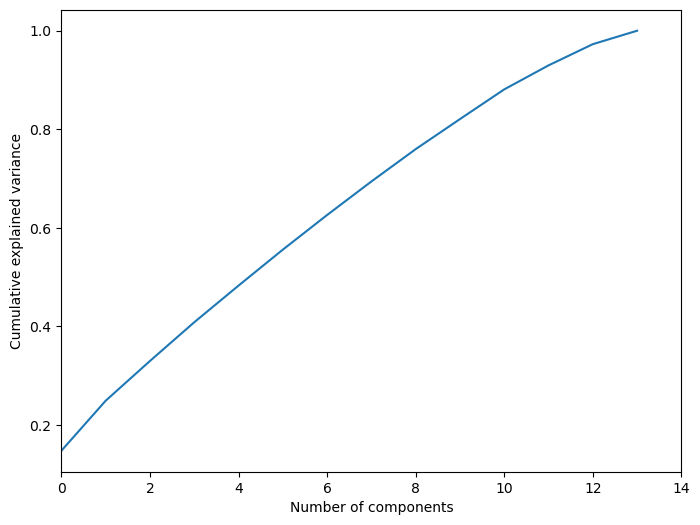

In [81]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [77]:
X = df.drop(['income','native-country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.5531


In [ ]:
X = df.drop(['income'], axis=1)

y = df['income']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

Random Forest